In [ ]:
#CS547 – ADVANCED TOPICS IN SOFTWARE ENGINEERING
#ASSIGNMENT - 1
#Group: CS547Assignment1Group22
#Members:
#1. HARSHAN RETHINAVELU SELVAKUMAR – 202480548
#2. MANOJ KUMAR DHARMARAJ - 202468855


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-faults/newsmallfaultmatrix.txt
/kaggle/input/test-faults/newbigfaultmatrix.txt


In [2]:
#Importing the necessary libraries
import random
from deap import creator,base,tools,algorithms

#Function that loads the data of the file
def load_file(filepath):
    
    #Create an empty list
    tests=[]
    
    with open(filepath,'r') as file:
        for line in file:
            
            #Taking each line of the file seperately, removing any leading whitespaces
            #Splitting the line into list of strings using commas
            seperate=line.strip().split(',')
            test_num=seperate[0]
            
            #Converting the detected faults to integers
            fault=list(map(int,seperate[1:]))
            
            #Adding the test id and the fault to the empty list 
            tests.append((test_num,fault))
            
    return tests

In [3]:
tests=load_file('/kaggle/input/test-faults/newbigfaultmatrix.txt')
print(tests)

[('t0', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('t1', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]), ('t10', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]), ('t100', [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]), ('t1000', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('t1001', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1]), ('t1002', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]), ('t1003', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 

In [4]:
#Fitness function to calculate the Average Percentage of Faults Detected(APFD)
def fit(order,tests):
    
    #Total number of tests
    num_of_tests=len(order)
    
    #Total number of faults
    num_of_faults=len(tests[0][1])
    
    #Keeping the firslty detected position of each fault
    fault_detect=[None]*num_of_faults
    
    #Creating a loop to iterate through each test in a given specific order
    for pos,index in enumerate(order,start=1):
        faults=tests[index][1]
        
        for ind,detected in enumerate(faults):
            if detected==1 and fault_detect[ind] is None:
                fault_detect[ind]=pos
    
    #Initializing total positions as zero
    total_pos=0
    
    #Calculating the total positions
    for pos in fault_detect:
        if pos is not None:
            total_pos+=pos
            
    #APFD = 1-(Total Positions/Total number of tests x Total number of faults)) + (1/(2 x Total number of tests))
    apfd=1-(total_pos/(num_of_tests*num_of_faults))+(1/(2*num_of_tests))
    return apfd

#Test Case for fitness function
tests=[('t0',[1,0,1,0,0]),
      ('t1',[0,1,0,1,1]),
      ('t2',[1,1,0,0,0])]

order=[0,1,2]

print(fit(order,tests))

0.6333333333333333


In [5]:
#Function for neighbor to provide a new solution by swapping of two elements
def neighbor(sol):
    
    #Creating a duplicate of the current original solution
    neigh=sol[:]
    
    #Selecting two positions randomly
    i,j=random.sample(range(len(sol)),2)
    
    #Swapping the elements at the given positions
    neigh[i],neigh[j]=neigh[j],neigh[i]
    return neigh

#Test case for neighbor function
order=[0,1,2,3,4]
new=neighbor(order)
print(order)
print(new)

[0, 1, 2, 3, 4]
[1, 0, 2, 3, 4]


In [6]:
#Random order function for test to calculate its APFD
def random_order(tests):
    
    #Creating a list of test index
    rand_order=list(range(len(tests)))
    
    #Shuffling the list for creating a random order
    random.shuffle(rand_order)
    
    #Computing the fitness for the random order
    fitness1=fit(rand_order,tests)
    return rand_order,fitness1

In [7]:
#Hill Climbing Algorithm
def hillClimb(tests,iterations=300):
    
    #Initializing with a random solution
    curr_order,curr_fit=random_order(tests)
    
    #Performing hill climb for the specified iterations
    for _ in range(iterations):
        
        #Generating neighbor solution
        neigh_order=neighbor(curr_order)
        
        #Calculating APFD for the neighbor
        neigh_fit=fit(neigh_order,tests)
        
        #Updating the current solution if the neighbor solution has better APFD
        if neigh_fit>curr_fit:
            curr_order=neigh_order
            curr_fit=neigh_fit
    
    #Getting test ids in the best order
    best_order=[tests[i][0] for i in curr_order]
    
    #Printing the solutions
    print("Best Order for HC:",best_order)
    print("Best APFD for HC:",curr_fit)
    return curr_fit
    
#matrix=[('t0',[1,0,1,0,0]),
      #('t1',[0,1,0,1,1]),
      #('t2',[1,1,0,0,0])]
#hillClimb(matrix,iterations=10)

testmatrix=load_file("/kaggle/input/test-faults/newbigfaultmatrix.txt")
hillClimb(testmatrix)
        

Best Order for HC: ['t10124', 't10076', 't10132', 't1073', 't10669', 't10503', 't1041', 't1042', 't10726', 't10851', 't1051', 't1000', 't10038', 't1008', 't10777', 't10429', 't10802', 't10659', 't1040', 't10156', 't10061', 't10764', 't10718', 't10373', 't1002', 't10056', 't10035', 't10751', 't10126', 't10717', 't10506', 't10138', 't10363', 't1080', 't10055', 't10139', 't10380', 't1017', 't1054', 't10071', 't10359', 't10464', 't10383', 't10800', 't10034', 't10675', 't10818', 't10886', 't10162', 't10064', 't10376', 't10716', 't10722', 't10065', 't1010', 't10860', 't1018', 't10136', 't10427', 't10548', 't10382', 't10739', 't1065', 't10052', 't10694', 't10461', 't10876', 't10463', 't10728', 't1027', 't10745', 't10547', 't1071', 't10679', 't10460', 't10772', 't103', 't1077', 't1078', 't1022', 't10366', 't10419', 't10761', 't10160', 't10723', 't10798', 't10732', 't10746', 't1028', 't10781', 't10377', 't10031', 't10763', 't10725', 't10123', 't10768', 't10047', 't10813', 't1036', 't10479', 't1

0.9452853770309679

In [8]:
#Genetic Algorithm
#Defining the type of fitness for maximization
creator.create("FitnessMax",base.Fitness,weights=(1.0,))

#Defining the type of individual
creator.create("Individual",list,fitness=creator.FitnessMax)

In [9]:
#Creating an individual function for the genetic algorithm
def createIndividual():
    
    #Creating a list of test index
    indices=list(range(len(testmatrix)))
    
    #Shuffling to create a random order
    random.shuffle(indices)
    return creator.Individual(indices) 

In [10]:
#Evaluation function for an individual in the population
def evaluate(individual):
    
    #Calculating the APFD for the order of individual
    fit_val=fit(individual,testmatrix)
    
    #Return as tuple
    return(fit_val,)

In [11]:
#Registering the functions in DEAP toolbox
tool=base.Toolbox()
tool.register("individual",createIndividual)
tool.register("population",tools.initRepeat,list,tool.individual)
tool.register("evaluate",evaluate)
tool.register("mate",tools.cxOrdered)
tool.register("mutate",tools.mutShuffleIndexes,indpb=0.05)
tool.register("select",tools.selTournament,tournsize=3)

In [12]:
def ga():
    size=20 #Size of the population
    gen=50 #Number of generations
    cprob=0.5 #Crossover Probability
    mprob=0.2 #Mutation Probability
    
    #Initialization of population 
    pop=tool.population(n=size)
    
    #Evaluating fitness for each individual
    for ind in pop:
        ind.fitness.values=tool.evaluate(ind)
    
    #Running the GA
    result,_=algorithms.eaSimple(pop,tool,cxpb=cprob,mutpb=mprob,ngen=gen,
                                   stats=None,verbose=True)
    
    bestInd=tools.selBest(result,k=1)[0]
    bestScore=bestInd.fitness.values[0]
    
    bestOrder=[]
    for i in bestInd:
        bestOrder.append(testmatrix[i][0])
        
    print("Best order for GA:",bestOrder)
    print("Best APFD for GA:",bestScore)
    return bestScore
    
ga()

gen	nevals
0  	0     
1  	9     
2  	13    
3  	11    
4  	9     
5  	11    
6  	9     
7  	8     
8  	12    
9  	16    
10 	14    
11 	17    
12 	11    
13 	9     
14 	11    
15 	11    
16 	15    
17 	15    
18 	14    
19 	13    
20 	11    
21 	18    
22 	10    
23 	15    
24 	12    
25 	16    
26 	14    
27 	11    
28 	16    
29 	5     
30 	15    
31 	12    
32 	13    
33 	12    
34 	13    
35 	12    
36 	16    
37 	9     
38 	8     
39 	10    
40 	13    
41 	11    
42 	13    
43 	12    
44 	16    
45 	11    
46 	3     
47 	10    
48 	20    
49 	15    
50 	12    
Best order for GA: ['t10369', 't10076', 't10421', 't10055', 't10057', 't1052', 't1000', 't1020', 't10776', 't10070', 't10139', 't10101', 't10876', 't10463', 't10761', 't10051', 't10359', 't10385', 't10131', 't10801', 't10162', 't108', 't10856', 't10457', 't10694', 't1080', 't10833', 't10468', 't1013', 't10500', 't1024', 't10829', 't10037', 't10892', 't10851', 't10739', 't10151', 't1075', 't10679', 't1089', 't10455', 't1081',

0.9688932092764894

In [13]:
runs=10

#Random Baseline Solution

def baseline(tests,runs):
    
    #Initialization of an empty list to store the APFD scores of each run
    apfds=[]
    
    for _ in range(runs):
        
        #Generating random order and calculate its APFD
        order,fitness=random_order(tests)
        
        #Add APFD score to the list
        apfds.append(fitness)
        
    return apfds

In [14]:
#Creating an empty list to store the APFD scores of Hill Climbing
hc_score=[]

#Creating an empty list to store the APFD scores of GA
ga_score=[]

#Running the hill climb for the given number of times and store the APFD scores
for i in range(runs):
    fitness=hillClimb(testmatrix)
    hc_score.append(fitness)

#Running the GA for the given number of times and store the APFD scores    
for i in range(runs):
    fitness1=ga()
    ga_score.append(fitness1)

baseline_score=baseline(testmatrix,runs)

print("Mean of APFD (Hill Climber): ",np.mean(hc_score))
print("Standard Deviation of APFD (Hill Climber): ",np.std(hc_score))
print("Mean of APFD (Genetic Algorithm): ",np.mean(ga_score))
print("Standard Deviation of APFD (Genetic Algorithm): ",np.std(ga_score))
print("Mean of APFD (Random Baseline): ",np.mean(baseline_score))
print("Standard Deviation of APFD (Random Baseline): ",np.std(baseline_score))

Best Order for HC: ['t1087', 't1042', 't10420', 't1086', 't10160', 't10540', 't1058', 't1000', 't10071', 't10504', 't10763', 't10059', 't10378', 't10079', 't10545', 't10371', 't10885', 't10480', 't10427', 't10465', 't10847', 't1049', 't1013', 't1033', 't10119', 't10382', 't10163', 't10164', 't10367', 't10664', 't1010', 't10068', 't1083', 't10359', 't10851', 't10428', 't10886', 't10468', 't1061', 't1059', 't1018', 't10044', 't10159', 't10136', 't1040', 't10451', 't100', 't10067', 't10167', 't10737', 't10802', 't1054', 't10484', 't10381', 't10144', 't10419', 't10454', 't10076', 't10380', 't10452', 't1072', 't10077', 't10057', 't10034', 't10742', 't1', 't10123', 't10668', 't1011', 't10544', 't10699', 't10850', 't10726', 't1062', 't10384', 't10482', 't1001', 't1037', 't1080', 't1004', 't1008', 't1069', 't1053', 't10066', 't10717', 't10149', 't1016', 't10505', 't10848', 't10684', 't10542', 't10101', 't1055', 't1046', 't1075', 't10461', 't10422', 't10860', 't1039', 't101', 't10139', 't1027',

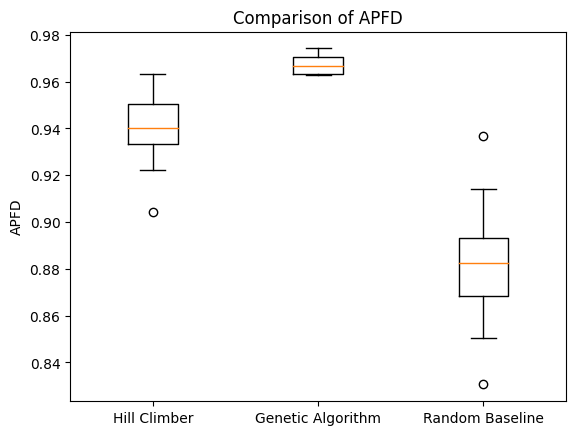

In [15]:
#Plotting Box plot to visualize the APFD

import matplotlib.pyplot as plt
plt.boxplot([hc_score,ga_score,baseline_score],labels=["Hill Climber","Genetic Algorithm","Random Baseline"])
plt.title("Comparison of APFD")
plt.ylabel("APFD")
plt.show()

In [16]:
#References
#https://deap.readthedocs.io/en/master/index.html
#https://github.com/DEAP/deap/tree/master/examples/ga
#S. Elbaum, A. G. Malishevsky and G. Rothermel, "Test case prioritization: a family of empirical studies," in IEEE Transactions on Software Engineering, vol. 28, no. 2, pp. 159-182, Feb. 2002, doi: 10.1109/32.988497.